In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [108]:
df = pd.read_csv('heart.csv')
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,1,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [109]:
df.shape

(50, 12)

In [110]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [111]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,1,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [112]:
df['Gender'] = df['Sex'].map({'M': 1, 'F':0})
df['ExerciseAngina_Encoded'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['ST_Slope_Encoded'] = df['ST_Slope'].map({'Up': 1, 'Flat': 0})
df['RestingECG_Encoded'] = df['RestingECG'].map({'Normal': 0, 'ST': 1})
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Gender,ExerciseAngina_Encoded,ST_Slope_Encoded,RestingECG_Encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,0,0,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,1,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0,0
4,54,M,NAP,150,195,1,Normal,122,N,0.0,Up,0,1,0,1,0


In [113]:
cols = list(df.columns)

cols.remove('Gender')
sex_idx = cols.index('Sex')
cols.insert(sex_idx + 1, 'Gender')

cols.remove('ExerciseAngina_Encoded')
ExerciseAngina_idx = cols.index('ExerciseAngina')
cols.insert(ExerciseAngina_idx + 1, 'ExerciseAngina_Encoded')

cols.remove('ST_Slope_Encoded')
ST_Slope_idx = cols.index('ST_Slope')
cols.insert(ST_Slope_idx + 1, 'ST_Slope_Encoded')

cols.remove('RestingECG_Encoded')
RestingECG_idx = cols.index('RestingECG')
cols.insert(RestingECG_idx + 1, 'RestingECG_Encoded')

df = df[cols]

df.head()

,Age,Sex,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,RestingECG_Encoded,MaxHR,ExerciseAngina,ExerciseAngina_Encoded,Oldpeak,ST_Slope,ST_Slope_Encoded,HeartDisease
0,40,M,1,ATA,140,289,0,Normal,0,172,N,0,0.0,Up,1,0
1,49,F,0,NAP,160,180,0,Normal,0,156,N,0,1.0,Flat,0,1
2,37,M,1,ATA,130,283,0,ST,1,98,N,0,0.0,Up,1,0
3,48,F,0,ASY,138,214,0,Normal,0,108,Y,1,1.5,Flat,0,1
4,54,M,1,NAP,150,195,1,Normal,0,122,N,0,0.0,Up,1,0


In [114]:
df.shape


(50, 16)

In [115]:
df.dtypes

Age                         int64
Sex                        object
Gender                      int64
ChestPainType              object
RestingBP                   int64
Cholesterol                 int64
FastingBS                   int64
RestingECG                 object
RestingECG_Encoded          int64
MaxHR                       int64
ExerciseAngina             object
ExerciseAngina_Encoded      int64
Oldpeak                   float64
ST_Slope                   object
ST_Slope_Encoded            int64
HeartDisease                int64
dtype: object

In [116]:
df.describe()

,Age,Gender,RestingBP,Cholesterol,FastingBS,RestingECG_Encoded,MaxHR,ExerciseAngina_Encoded,Oldpeak,ST_Slope_Encoded,HeartDisease
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,46.280000,0.660000,128.240000,245.080000,0.120000,0.200000,140.900000,0.220000,0.580000,0.560000,0.320000
std,7.777624,0.478518,13.964328,68.487401,0.328261,0.404061,23.602361,0.418452,0.894199,0.501427,0.471212
min,32.000000,0.000000,100.000000,164.000000,0.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,120.000000,201.750000,0.000000,0.000000,122.750000,0.000000,0.000000,0.000000,0.000000
50%,46.500000,1.000000,127.500000,225.500000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000
75%,53.000000,1.000000,140.000000,280.500000,0.000000,0.000000,163.000000,0.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,160.000000,518.000000,1.000000,1.000000,184.000000,1.000000,3.000000,1.000000,1.000000


In [117]:
# Summary statistics for categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
print("Distribution of categorical variables:")

for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())
    print(f"{col} Percentage:")
    print(df[col].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Distribution of categorical variables:

Sex Distribution:
Sex
M    33
F    17
Name: count, dtype: int64
Sex Percentage:
Sex
M    66.0%
F    34.0%
Name: proportion, dtype: object

ChestPainType Distribution:
ChestPainType
ATA    23
NAP    13
ASY    13
TA      1
Name: count, dtype: int64
ChestPainType Percentage:
ChestPainType
ATA    46.0%
NAP    26.0%
ASY    26.0%
TA      2.0%
Name: proportion, dtype: object

RestingECG Distribution:
RestingECG
Normal    40
ST        10
Name: count, dtype: int64
RestingECG Percentage:
RestingECG
Normal    80.0%
ST        20.0%
Name: proportion, dtype: object

ExerciseAngina Distribution:
ExerciseAngina
N    39
Y    11
Name: count, dtype: int64
ExerciseAngina Percentage:
ExerciseAngina
N    78.0%
Y    22.0%
Name: proportion, dtype: object

ST_Slope Distribution:
ST_Slope
Up      28
Flat    22
Name: count, dtype: int64
ST_Slope Percentage:
ST_Slope
Up      56.0%
Flat    44.0%
Name: proportion, dtype: object

HeartDisease Distribution:
HeartDisease
0    34

In [118]:
true_numeric = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary_encoded = ['Gender', 'ExerciseAngina_Encoded', 'FastingBS', 'ST_Slope_Encoded', 'RestingECG_Encoded', 'HeartDisease']

df = pd.get_dummies(df, columns=['ChestPainType'])

df.head()

,Age,Sex,Gender,RestingBP,Cholesterol,FastingBS,RestingECG,RestingECG_Encoded,MaxHR,ExerciseAngina,ExerciseAngina_Encoded,Oldpeak,ST_Slope,ST_Slope_Encoded,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,M,1,140,289,0,Normal,0,172,N,0,0.0,Up,1,0,False,True,False,False
1,49,F,0,160,180,0,Normal,0,156,N,0,1.0,Flat,0,1,False,False,True,False
2,37,M,1,130,283,0,ST,1,98,N,0,0.0,Up,1,0,False,True,False,False
3,48,F,0,138,214,0,Normal,0,108,Y,1,1.5,Flat,0,1,True,False,False,False
4,54,M,1,150,195,1,Normal,0,122,N,0,0.0,Up,1,0,False,False,True,False


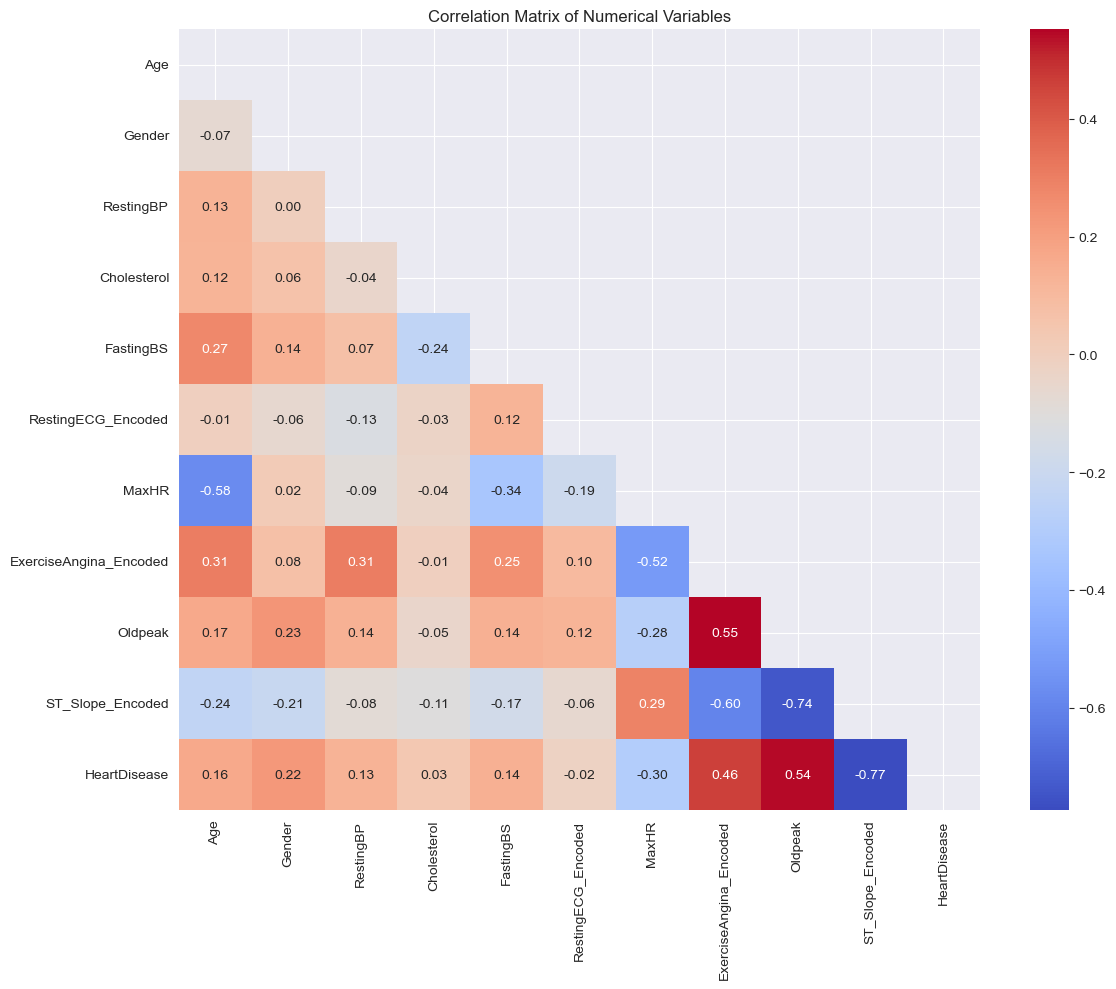

In [119]:
# Correlation analysis for numerical variables
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 10))
correlation = numeric_df.corr()
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()